In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

In [4]:
# Input your vacation start and end dates
startdate = input('Enter vacation start date (yyyy-mm-dd): ')
enddate = input('Enter vacation end date (yyyy-mm-dd): ')

Enter vacation start date (yyyy-mm-dd): 2017-01-26
Enter vacation end date (yyyy-mm-dd): 2017-02-16


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Print fields in the measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(f'{c["name"]}      \t{c["type"]}')

id      	INTEGER
station      	TEXT
date      	TEXT
prcp      	FLOAT
tobs      	FLOAT


In [12]:
# Preview the measurement table
engine.execute('SELECT * FROM  Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Print Fields in the station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(f'{c["name"]}      \t{c["type"]}')

id      	INTEGER
station      	TEXT
name      	TEXT
latitude      	FLOAT
longitude      	FLOAT
elevation      	FLOAT


In [14]:
# Preview the station table
engine.execute('SELECT * FROM  Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find last date in database from Measurements 
last_date = session.query(Measurement.date).\
            order_by(Measurement.date.desc()).first()

# Convert last date string to date
last_date=dt.datetime.strptime(last_date[0], "%Y-%m-%d")

# Calculate date one year after last date using timedelta datetime function
first_date = last_date - timedelta(days=365)

lastdate=pd.to_datetime(last_date).date()
firstdate=pd.to_datetime(first_date).date()
print(f"Last date in Measurments is: {lastdate}")
print(f"First date of the analysis is: {firstdate}")

Last date in Measurments is: 2017-08-23
First date of the analysis is: 2016-08-23


In [16]:
# Perform a query to retrieve the precipitation data
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= firstdate).all()

In [17]:
# Load data to a dataframe
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

# Clean up non value entries
precipitation_df = precipitation_df.dropna()

# Sort dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date', ascending=True)
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15
...,...,...
2228,2017-08-22,0.50
360,2017-08-23,0.00
1528,2017-08-23,0.08
1008,2017-08-23,0.00


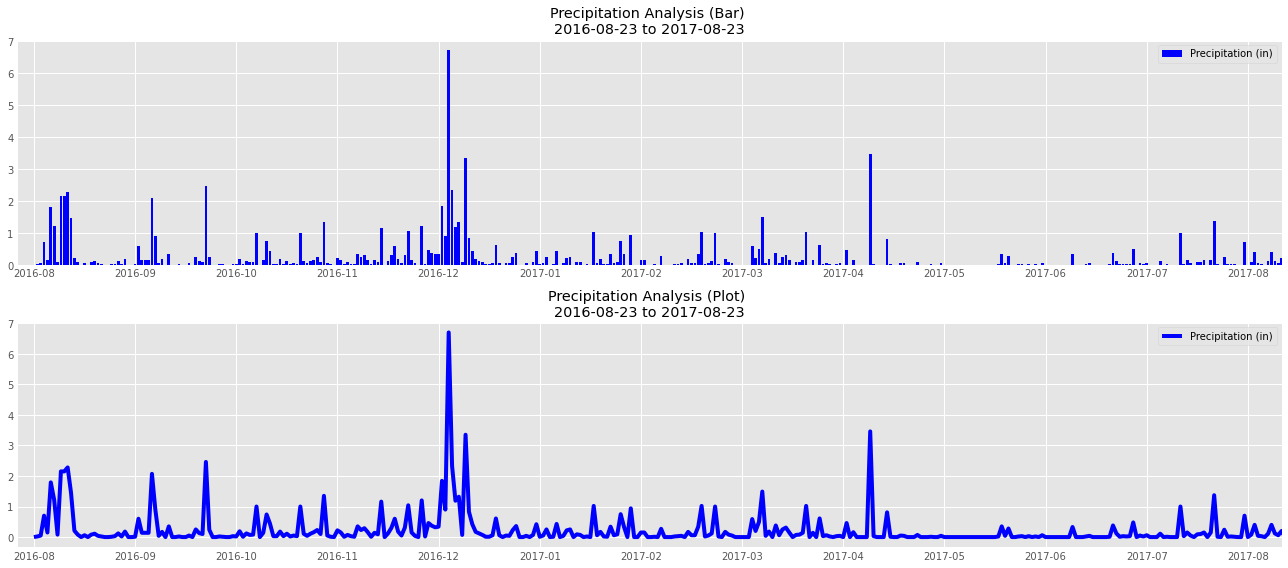

In [18]:
plt.style.use('ggplot')
x_label = ['2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
          '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', 
          '2017-06', '2017-07', '2017-08', ]
x_value= np.arange(len(precipitation_df["Date"]))
fig, ax = plt.subplots(nrows=2,figsize=(18, 8))
major_ticks = np.arange(0, 390, 30)
ax[0].bar(x_value, precipitation_df["Precipitation"], color='blue')
ax[0].set_xticks(major_ticks)
ax[0].set_xticklabels(x_label)
ax[0].set_xlim(-5,370)
ax[0].legend(['Precipitation (in)'], loc=0)
ax[0].set_title(f"Precipitation Analysis (Bar) \n{firstdate} to {lastdate}")
ax[1].plot(x_value, precipitation_df["Precipitation"], color='blue')
ax[1].set_xticks(major_ticks)
ax[1].set_xticklabels(x_label)
ax[1].set_xlim(-5,370)
ax[1].legend(['Precipitation (in)'], loc=0)
ax[1].set_title(f"Precipitation Analysis (Plot) \n{firstdate} to {lastdate}")
plt.tight_layout()
plt.savefig("Output/Fig 1. Barchart - Precipitation by Date" +'.png',bbox_inches='tight')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
                    filter(Station.station == Measurement.station).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

station_counts

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Create top station variable from tuple
top_station = (station_counts[0])
top_station = (top_station[0])

top_station

'USC00519281'

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station,  func.min(Measurement.tobs), 
              func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == top_station).\
    group_by(Measurement.station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station = session.query(Measurement.date,  Measurement.tobs).\
                    filter(Measurement.station == top_station).\
                    filter(Measurement.date >= firstdate).all()

In [25]:
# Top Station Temperature dataframe cleanning process
top_station_df = pd.DataFrame(top_station, columns=['Date', 'Temperature'])
top_station_df = top_station_df.sort_values(by='Date', ascending=True)
top_station_df.set_index('Date', inplace=True)

top_station_df

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


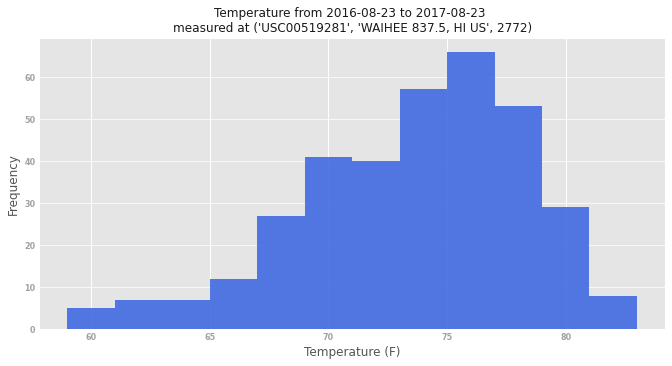

In [26]:
# Resize Plot
plt.figure(figsize=[10,5])

# Define Histogram paramaters
n, bins, patches = plt.hist(x=top_station_df["Temperature"], bins=12, 
                           color='royalblue',alpha=0.9)
# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=8, fontweight="bold", alpha=0.55)
plt.yticks(fontsize=8, fontweight="bold", alpha=0.55)
plt.title(f"Temperature from {firstdate} to {lastdate} \nmeasured at {station_counts[0]}",
          alpha=0.9, fontsize=12)

# Save Plot
plt.savefig("Output/Fig 2. Histogram - Temperature Frequency for the Top Station" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Vaction dates for a trip to Hawaii!
print(f"First vacation day in Hawaii: {startdate}")
print(f"Last vacation day in Hawaii: {enddate}")

start_date = (dt.datetime.strptime(startdate,'%Y-%m-%d') - dt.timedelta(days=366)).strftime('%Y-%m-%d')
end_date = (dt.datetime.strptime(enddate,'%Y-%m-%d') - dt.timedelta(days=366)).strftime('%Y-%m-%d')

print(f"Dates and temps for the previous year:")
print(start_date)
print(end_date)

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

tempresult = calc_temps(start_date,end_date)[0]
print(tempresult)

First vacation day in Hawaii: 2017-01-26
Last vacation day in Hawaii: 2017-02-16
Dates and temps for the previous year:
2016-01-26
2016-02-16
(56.0, 69.53956834532374, 79.0)


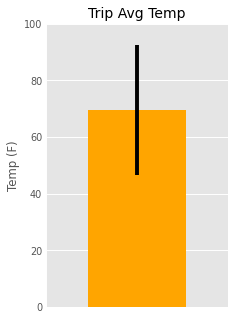

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_pos = [0]
y_pos = [tempresult[1]]
error = [(tempresult[2] - tempresult[0])]

w = 3
h = 5
d = 70
plt.figure(figsize=(w, h), dpi=d)
plt.bar(x_pos,y_pos,color='orange', yerr=error)
plt.xlim(-0.75,0.75)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.ylim(0, 100)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid(which='major', axis='x', linestyle='')
plt.grid(which='major', axis='y', linestyle='-')
# Save Plot
plt.savefig("Output/Fig 3. Barchart - Trip Average Temperature" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

query_columns = [Station.station, Station.name, func.sum(Measurement.tobs), Station.latitude, Station.longitude, Station.elevation]

last_year_data =    session.query(*query_columns).\
                    group_by(Measurement.station).\
                    outerjoin(Station, Measurement.station==Station.station).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                    order_by(func.sum(Measurement.tobs).desc()).all()
last_year_data

[('USC00513117', 'KANEOHE 838.1, HI US', 1579.0, 21.4234, -157.8015, 14.6),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 1506.0, 21.2716, -157.8168, 3.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  1485.0,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  1479.0,
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  1418.0,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  1177.0,
  21.33556,
  -157.71139,
  19.5),
 ('USC00517948', 'PEARL CITY, HI US', 1022.0, 21.3934, -157.9751, 11.9)]

In [31]:
pd.DataFrame(last_year_data,
             columns=["Station","Station Name", "Total Rainfall", "Latitude", "Longitude", "Elevation"]
            ).sort_values("Total Rainfall",ascending=False)

,Station,Station Name,Total Rainfall,Latitude,Longitude,Elevation
0,USC00513117,"KANEOHE 838.1, HI US",1579.0,21.42340,-157.80150,14.6
1,USC00519397,"WAIKIKI 717.2, HI US",1506.0,21.27160,-157.81680,3.0
2,USC00519281,"WAIHEE 837.5, HI US",1485.0,21.45167,-157.84889,32.9
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1479.0,21.52130,-157.83740,7.0
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",1418.0,21.33310,-157.80250,152.4
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",1177.0,21.33556,-157.71139,19.5
6,USC00517948,"PEARL CITY, HI US",1022.0,21.39340,-157.97510,11.9


In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

dtobj = dt.datetime.strptime(startdate, '%Y-%m-%d')
enddtobj = dt.datetime.strptime(enddate, '%Y-%m-%d')

tripdates = []
normals =[]
while (dtobj <= enddtobj):
    tripdates.append(dt.datetime.strftime(dtobj,'%Y-%m-%d'))
    datestr = dt.datetime.strftime(dtobj,'%m-%d')
    normals.append(list(np.ravel(daily_normals(datestr))))
    dtobj = dtobj + dt.timedelta(days = 1)

# Vaction dates for a trip to Hawaii!
print(f"First vacation day in Hawaii: {startdate}")
print(f"Last vacation day in Hawaii: {enddate}")

normals

First vacation day in Hawaii: 2017-01-26
Last vacation day in Hawaii: 2017-02-16


[[61.0, 70.58620689655173, 77.0],
 [59.0, 68.56896551724138, 75.0],
 [62.0, 69.03703703703704, 77.0],
 [64.0, 69.14, 76.0],
 [60.0, 67.12962962962963, 77.0],
 [60.0, 68.47368421052632, 74.0],
 [56.0, 68.14035087719299, 78.0],
 [59.0, 68.85964912280701, 77.0],
 [58.0, 67.79661016949153, 77.0],
 [61.0, 68.14035087719299, 76.0],
 [59.0, 69.6842105263158, 80.0],
 [58.0, 70.38983050847457, 77.0],
 [60.0, 69.0, 77.0],
 [56.0, 66.75438596491227, 74.0],
 [57.0, 67.58928571428571, 75.0],
 [56.0, 68.41666666666667, 76.0],
 [61.0, 69.25, 79.0],
 [60.0, 69.15789473684211, 78.0],
 [58.0, 70.36206896551724, 80.0],
 [62.0, 70.89473684210526, 79.0],
 [56.0, 70.28813559322033, 79.0],
 [59.0, 70.48214285714286, 76.0]]

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
thisplan = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
thisplan['Date'] = tripdates
thisplan = thisplan.set_index("Date")
thisplan

,tmin,tavg,tmax
Date,,,
2017-01-26,61.0,70.586207,77.0
2017-01-27,59.0,68.568966,75.0
2017-01-28,62.0,69.037037,77.0
2017-01-29,64.0,69.140000,76.0
2017-01-30,60.0,67.129630,77.0
2017-01-31,60.0,68.473684,74.0
2017-02-01,56.0,68.140351,78.0
2017-02-02,59.0,68.859649,77.0
2017-02-03,58.0,67.796610,77.0


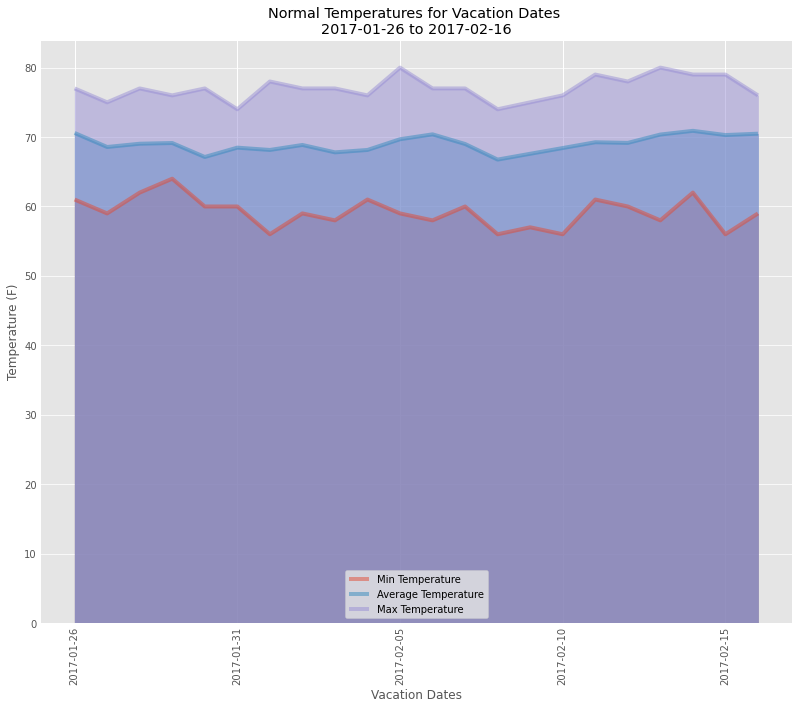

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
thisplan.plot.area(stacked=False, figsize=(12, 10))

# Legend
plt.legend(('Min Temperature', 'Average Temperature', 'Max Temperature'),loc='lower center')

# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Vacation Dates')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=90)
plt.title(f"Normal Temperatures for Vacation Dates \n{startdate} to {enddate}") 

# Save Plot
plt.savefig("Output/Fig 4. Area Plot - Normal Temperatures for Vacation Dates" +'.png',
            bbox_inches='tight')

#Show the Plot
plt.show();